In [ ]:
#Khai báo các thư viện cần sử dụng
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Food/Train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 633 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu test
test_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Food/Test', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 68 images belonging to 10 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training
training_set.class_indices

{'Banh chung': 0,
 'Banh gio': 1,
 'Banh mi': 2,
 'Banh pia': 3,
 'Banh trang nuong': 4,
 'Banh xeo': 5,
 'Bánh bèo': 6,
 'Bánh bông lan': 7,
 'Bún đậu': 8,
 'Nem chua': 9}

In [ ]:
# Các nhãn có trong bộ dữ liệu test
test_set.class_indices

{'Banh chung': 0,
 'Banh gio': 1,
 'Banh mi': 2,
 'Banh pia': 3,
 'Banh trang nuong': 4,
 'Banh xeo': 5,
 'Bánh bèo': 6,
 'Bánh bông lan': 7,
 'Bún đậu': 8,
 'Nem chua': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(224,224,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                 

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=20,batch_size=128,verbose=2)

Epoch 1/20
20/20 - 239s - loss: 2.3802 - accuracy: 0.0964 - 239s/epoch - 12s/step
Epoch 2/20
20/20 - 234s - loss: 2.2781 - accuracy: 0.1627 - 234s/epoch - 12s/step
Epoch 3/20
20/20 - 228s - loss: 2.1700 - accuracy: 0.2354 - 228s/epoch - 11s/step
Epoch 4/20
20/20 - 229s - loss: 1.9682 - accuracy: 0.3175 - 229s/epoch - 11s/step
Epoch 5/20
20/20 - 230s - loss: 1.9444 - accuracy: 0.3112 - 230s/epoch - 12s/step
Epoch 6/20
20/20 - 233s - loss: 1.8148 - accuracy: 0.3365 - 233s/epoch - 12s/step
Epoch 7/20
20/20 - 233s - loss: 1.7305 - accuracy: 0.3507 - 233s/epoch - 12s/step
Epoch 8/20
20/20 - 237s - loss: 1.6466 - accuracy: 0.4155 - 237s/epoch - 12s/step
Epoch 9/20
20/20 - 234s - loss: 1.6129 - accuracy: 0.4028 - 234s/epoch - 12s/step
Epoch 10/20
20/20 - 233s - loss: 1.5160 - accuracy: 0.4834 - 233s/epoch - 12s/step
Epoch 11/20
20/20 - 231s - loss: 1.4296 - accuracy: 0.4692 - 231s/epoch - 12s/step
Epoch 12/20
20/20 - 234s - loss: 1.3575 - accuracy: 0.5340 - 234s/epoch - 12s/step
Epoch 13/20
2

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.45152419805526733
Train Accuracy 0.8404423594474792


<function matplotlib.pyplot.show(*args, **kw)>

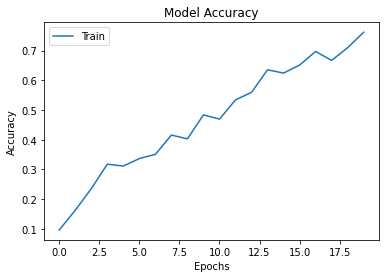

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Food.h5")

In [ ]:
# Tải mô hình 
model_food=load_model('Food.h5')

1/1 [==============================] - 0s 251ms/step
[[7.5313740e-04 1.0477023e-05 2.2542785e-09 1.2193868e-07 1.0113237e-07
  9.9921715e-01 1.4616973e-06 3.4403229e-07 1.3805333e-05 3.3109927e-06]]
1/1 [==============================] - 0s 118ms/step
Banh xeo


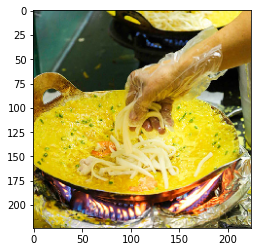

In [ ]:
from keras.utils import img_to_array
import numpy as np 
from keras.utils import load_img
img = load_img('banhxeo (2).jpg',target_size = (224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
#img = img[:,:,0]
img = img.astype('float32')
img = img/255
img = img.reshape(-1,224,224,3)
class_names = ['Banh chung','Banh gio','Banh mi','Banh pia','Banh trang nuong','Banh xeo','Bánh bèo','Bánh bông lan','Bún đậu','Nem chua']
print(model_food.predict(img))
print(class_names[np.argmax(model_food.predict(img))])

1/1 [==============================] - 0s 124ms/step
[[1.3822293e-07 3.9053040e-07 9.9783200e-01 1.0503157e-09 2.6868523e-09
  2.1435577e-07 5.8580646e-10 4.2312663e-15 2.2777822e-04 1.9394504e-03]]
1/1 [==============================] - 0s 109ms/step
Banh mi


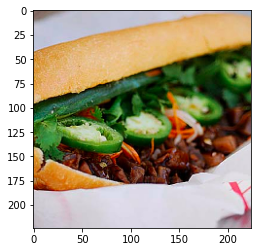

In [ ]:
from keras.utils import img_to_array
import numpy as np 
from keras.utils import load_img
img = load_img('banhmitest (2).jpg',target_size = (224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
#img = img[:,:,0]
img = img.astype('float32')
img = img/255
img = img.reshape(-1,224,224,3)
class_names = ['Banh chung','Banh gio','Banh mi','Banh pia','Banh trang nuong','Banh xeo','Bánh bèo','Bánh bông lan','Bún đậu','Nem chua']
print(model_food.predict(img))
print(class_names[np.argmax(model_food.predict(img))])

1/1 [==============================] - 0s 115ms/step
[[9.80339110e-01 5.88920448e-05 6.61882863e-04 2.38715963e-08
  1.17837905e-03 6.19611377e-03 2.29409508e-07 6.99768918e-08
  1.16835115e-04 1.14484010e-02]]
1/1 [==============================] - 0s 115ms/step
Banh chung


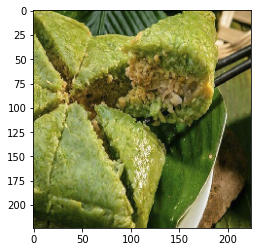

In [ ]:
from keras.utils import img_to_array
import numpy as np 
from keras.utils import load_img
img = load_img('banhchungtest (1).jpg',target_size = (224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
#img = img[:,:,0]
img = img.astype('float32')
img = img/255
img = img.reshape(-1,224,224,3)
class_names = ['Banh chung','Banh gio','Banh mi','Banh pia','Banh trang nuong','Banh xeo','Bánh bèo','Bánh bông lan','Bún đậu','Nem chua']
print(model_food.predict(img))
print(class_names[np.argmax(model_food.predict(img))])

1/1 [==============================] - 0s 112ms/step
[[2.7781690e-03 6.7731589e-02 5.0910152e-05 8.2429706e-06 2.0917609e-05
  1.0597319e-03 8.5859408e-04 1.8424038e-07 2.4262317e-01 6.8486851e-01]]
1/1 [==============================] - 0s 111ms/step
Nem chua


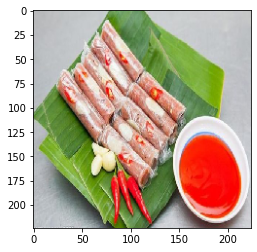

In [ ]:
from keras.utils import img_to_array
import numpy as np 
from keras.utils import load_img
img = load_img('nemchuatest (4).jpg',target_size = (224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
#img = img[:,:,0]
img = img.astype('float32')
img = img/255
img = img.reshape(-1,224,224,3)
class_names = ['Banh chung','Banh gio','Banh mi','Banh pia','Banh trang nuong','Banh xeo','Bánh bèo','Bánh bông lan','Bún đậu','Nem chua']
print(model_food.predict(img))
print(class_names[np.argmax(model_food.predict(img))])

1/1 [==============================] - 0s 109ms/step
[[1.9358032e-04 3.3405840e-03 6.9817336e-04 7.8158575e-01 1.9469559e-02
  1.1322204e-04 3.0962471e-04 1.5654786e-01 3.7718426e-05 3.7703969e-02]]
1/1 [==============================] - 0s 114ms/step
Banh pia


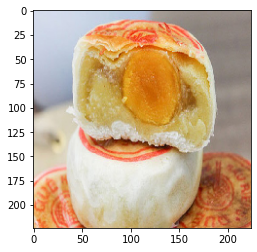

In [ ]:
from keras.utils import img_to_array
import numpy as np 
from keras.utils import load_img
img = load_img('banhpia (4).jpg',target_size = (224,224,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,224,224,3)
#img = img[:,:,0]
img = img.astype('float32')
img = img/255
img = img.reshape(-1,224,224,3)
class_names = ['Banh chung','Banh gio','Banh mi','Banh pia','Banh trang nuong','Banh xeo','Bánh bèo','Bánh bông lan','Bún đậu','Nem chua']
print(model_food.predict(img))
print(class_names[np.argmax(model_food.predict(img))])